In [0]:
%%writefile imageclassifier.py

import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
target_size = (224, 224)

def predict(model, img, target_size, top_n=3):
  """Run model prediction on image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
    top_n: # of top predictions to return
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return decode_predictions(preds, top=top_n)[0]

def plot_preds(image, preds):
  """Displays image and the top-n predicted probabilities in a bar graph
  Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure()
  order = list(reversed(range(len(preds))))
  bar_preds = [pr[2] for pr in preds]
  labels = (pr[1] for pr in preds)
  plt.barh(order, bar_preds, alpha=0.5)
  plt.yticks(order, labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  plt.show()

if __name__=="__main__":
  a = argparse.ArgumentParser()
  a.add_argument("--image", help="path to image")
  a.add_argument("--image_url", help="url to image")
  args = a.parse_args()

  if args.image is None and args.image_url is None:
    a.print_help()
    sys.exit(1)

  if args.image is not None:
    img = Image.open(args.image)
    preds = predict(model, img, target_size)
    plot_preds(img, preds)

  if args.image_url is not None:
    response = requests.get(args.image_url)
    img = Image.open(BytesIO(response.content))
    preds = predict(model, img, target_size)
    plot_preds(img, preds)


Overwriting imageclassifier.py


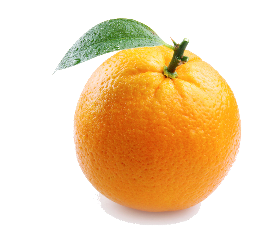

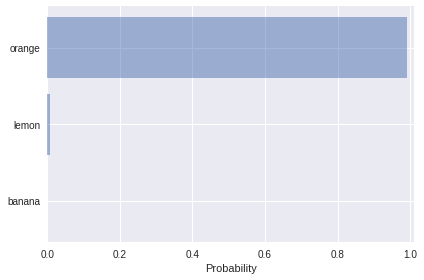

In [0]:
%run imageclassifier.py --image_url http://images6.fanpop.com/image/photos/34500000/Orange-Fruit-orange-34512881-2260-2175.jpg